# サンプルコードURL

https://github.com/PracticalTimeSeriesAnalysis/BookRepo

# 6章　時系列に使える統計モデル

## 6.1　線形回帰を使わない理由

1. 線形回帰はデータが独立同分布(iid)であることを仮定する。
2. 時系列データは時間的に近い点同士に強い相関が存在する傾向がある。
3. 但し、以下の条件を満たせば最小二乗線形回帰を使用することが可能。
       1.(時系列の挙動)時系列は予測変数に対して線形に応答する。
       2.(時系列の挙動)入力変数はいずれも、時間的に一定であったり別の入力変数と完全な相関を持つことは無い。
       3.(誤差)各自転について、誤差の期待値は、全ての期間における全ての説明変数が与えられた場合に、ゼロである。
       4.(誤差)任意の期間における誤差は、過去もしくは未来のどの期間における入力とも相関がない。したがって、誤差の自己相関関数のプロットは、どんなパターンも示さない。
       5.(誤差)誤差の分散は時間に独立である。

## 6.2　時系列用に開発された統計手法

UCI機械学習レポジトリの需要予測データを使用する。

In [1]:
#ファイルの読み込み
data <- read.table("Daily_Demand_Forecasting_Orders.csv",sep = ";",header = T)
#check.names=FALSEで.を変更できる

In [2]:
#データの確認
head(data,10)

,Week.of.the.month..first.week..second..third..fourth.or.fifth.week,Day.of.the.week..Monday.to.Friday.,Non.urgent.order,Urgent.order,Order.type.A,Order.type.B,Order.type.C,Fiscal.sector.orders,Orders.from.the.traffic.controller.sector,Banking.orders..1.,Banking.orders..2.,Banking.orders..3.,Target..Total.orders.
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
2,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
3,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
4,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
5,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
6,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
7,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
8,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
9,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291


In [3]:
#カラム名の確認
names(data)

[1] "Week.of.the.month..first.week..second..third..fourth.or.fifth.week"
 [2] "Day.of.the.week..Monday.to.Friday."                                
 [3] "Non.urgent.order"                                                  
 [4] "Urgent.order"                                                      
 [5] "Order.type.A"                                                      
 [6] "Order.type.B"                                                      
 [7] "Order.type.C"                                                      
 [8] "Fiscal.sector.orders"                                              
 [9] "Orders.from.the.traffic.controller.sector"                         
[10] "Banking.orders..1."                                                
[11] "Banking.orders..2."                                                
[12] "Banking.orders..3."                                                
[13] "Target..Total.orders."

### Attribute Information:

The dataset was collected during 60 days, this is a real database of a brazilian logistics company. The dataset has twelve predictive attributes and a target that is the total of orders for daily treatment. The database was used in academic research at the Universidade Nove de Julho.
.arff header for Weka:

@relation Daily_Demand_Forecasting_Orders


|Kind|Column Name|Diffinition|
|-|-|-|
|@attribute|Week_of_the_month|{1.0, 2.0, 3.0, 4.0, 5.0}|
|@attribute|Day_of_the_week_(Monday_to_Friday)|{2.0, 3.0, 4.0, 5.0, 6.0}|
|@attribute|Non_urgent_order|integer|
|@attribute|Urgent_order|integer|
|@attribute|Order_type_A|integer|
|@attribute|Order_type_B|integer|
|@attribute|Order_type_C|integer|
|@attribute|Fiscal_sector_orders|integer|
|@attribute|Orders_from_the_traffic_controller_sector|integer|
|@attribute|Banking_orders_(1)|integer|
|@attribute|Banking_orders_(2)|integer|
|@attribute|Banking_orders_(3)|integer|
|@attribute|Target_(Total_orders)|integer|

In [4]:
colnames(data) <- c("Week_of_the_month","Day_of_the_week","Non_urgent_order","Urgent_order","Order_type_A","Order_type_B","Order_type_C","Fiscal_sector_orders","Orders_from_the_traffic_controller_sector","Banking_orders_1","Banking_orders_2","Banking_orders_3","Target_Total_orders")

In [5]:
#カラム名の確認
names(data)

[1] "Week_of_the_month"                        
 [2] "Day_of_the_week"                          
 [3] "Non_urgent_order"                         
 [4] "Urgent_order"                             
 [5] "Order_type_A"                             
 [6] "Order_type_B"                             
 [7] "Order_type_C"                             
 [8] "Fiscal_sector_orders"                     
 [9] "Orders_from_the_traffic_controller_sector"
[10] "Banking_orders_1"                         
[11] "Banking_orders_2"                         
[12] "Banking_orders_3"                         
[13] "Target_Total_orders"

In [6]:
#データの確認
head(data,10)

,Week_of_the_month,Day_of_the_week,Non_urgent_order,Urgent_order,Order_type_A,Order_type_B,Order_type_C,Fiscal_sector_orders,Orders_from_the_traffic_controller_sector,Banking_orders_1,Banking_orders_2,Banking_orders_3,Target_Total_orders
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
2,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
3,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
4,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
5,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
6,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
7,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
8,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
9,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291


### 6.2.1自己回帰モデル

AR(1)モデル<br >
&emsp;$
y_t = \phi_0 + \phi_1 × y_{t-1} + \epsilon_t
$

&emsp;AR(autoregressive)モデルはその名の通り「過去は将来を予測する」という直感に依拠している。<br >
&emsp;→定常性を持つ

(弱)定常性:<br>
&emsp; 1. 期待値は時点によらず一定($\mu_t$=$\mu$)<br>
&emsp; 2. 分散は時点によらず一定($\theta_t$=$\theta$)<br>
&emsp; 3. 自己共分散は時間差のみに依存し、時点と無関係<br>

式6-3:<br>
&emsp;$\mu$=$\frac{\phi}{1-\phi}$

P.163　分散の定義:<br>
$var(y_t)=\frac{var(e_t)}{1-\phi_1^2}$

AR(p)モデルへの拡張<br>
&emsp;偏自己相関関数をプロットして過程の次数をどこでカットするのかを判定。

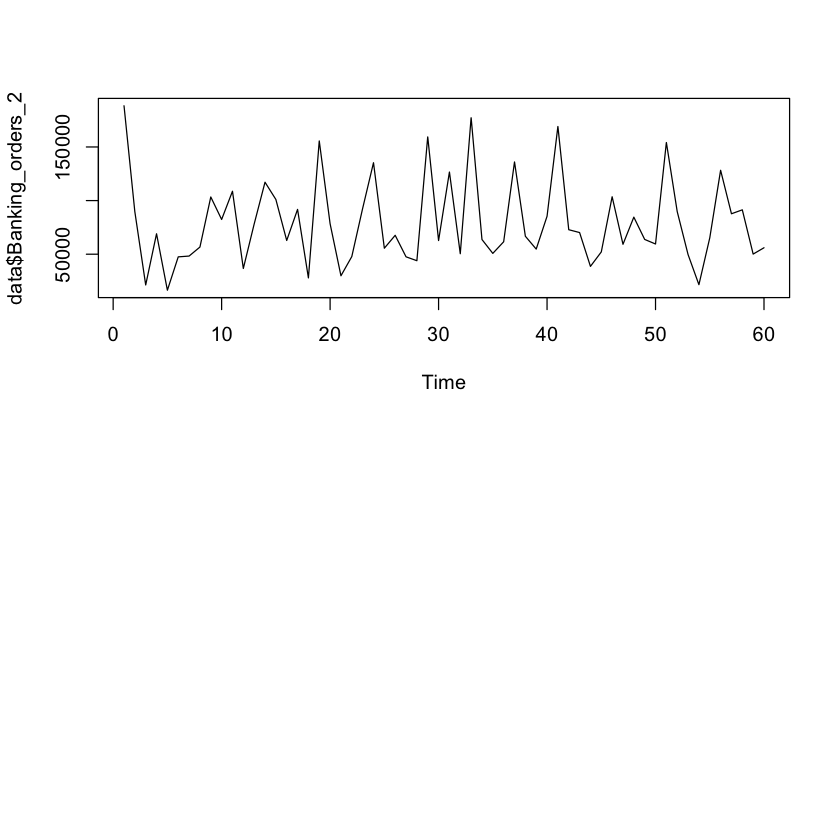

In [7]:
#カラム[Banking_orders_(2)]の時系列プロット
par(mfrow=c(2,1))
ts.plot(data$Banking_orders_2)

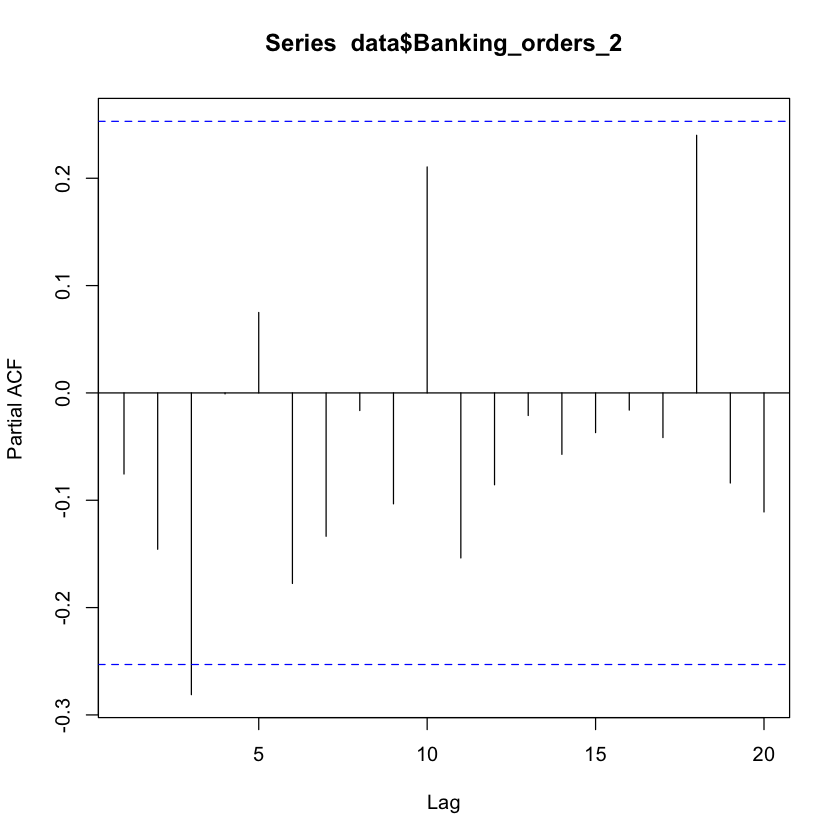

In [8]:
#カラム[Banking_orders_(2)]のPACFプロット
pacf(data$Banking_orders_2,lag.max=20)

#### ARモデルの当てはめ

In [9]:
#(1)時系列のARモデルの当てはめ - ar関数の利用（最尤法による）
fit <- ar(data$Banking_orders_2,method = "mle")
fit


Call:
ar(x = data$Banking_orders_2, method = "mle")

Coefficients:
      1        2        3  
-0.1360  -0.2014  -0.3175  

Order selected 3  sigma^2 estimated as  1.414e+09

---

モデルの当てはめには
1. 最小二乗誤差法（OLS)
2. 最尤法（MLE）
<br >が選択可能

OLS推定量の性質<br >
1. OLS推定量は一致推定量である
2. OLS推定量を基準化したものは漸近的に正規分布に従う
3. $\epsilon$~iid N(0,$\theta$)のとき、OLS推定量は一致推定量の中で漸近的に最小の分散共分散行列を持つ

AR過程の場合は説明変数が過去の誤差項と相関を持つ。<br >
$
y_t = \phi_0 + \phi_1 × y_{t-1} + \epsilon_t
$

→標本誤差を最小化する操作は、誤差が独立同分布であることを前提とするが、<br >
&emsp;過去の誤差項と相関を持つモデルには不適切であるからと解釈。

---

In [10]:
#(2)時系列のARモデルの当てはめ - arima関数の利用（次数を指定する場合）
est <- arima(x=data$Banking_orders_2,order=c(3,0,0))
est


Call:
arima(x = data$Banking_orders_2, order = c(3, 0, 0))

Coefficients:
          ar1      ar2      ar3  intercept
      -0.1358  -0.2013  -0.3176  79075.350
s.e.   0.1299   0.1289   0.1296   2981.131

sigma^2 estimated as 1.414e+09:  log likelihood = -717.42,  aic = 1444.83

In [11]:
#(3)時系列のARモデルの当てはめ - ラグ-1の項を「0」にしてみる（1時点前の影響は受けない)
est.1 <- arima(x=data$Banking_orders_2,order=c(3,0,0),fixed=c(0,NA,NA,NA))
est.1

Warning message in arima(x = data$Banking_orders_2, order = c(3, 0, 0), fixed = c(0, :
“some AR parameters were fixed: setting transform.pars = FALSE”



Call:
arima(x = data$Banking_orders_2, order = c(3, 0, 0), fixed = c(0, NA, NA, NA))

Coefficients:
      ar1      ar2      ar3  intercept
        0  -0.1831  -0.3031  79190.705
s.e.    0   0.1289   0.1298   3345.252

sigma^2 estimated as 1.44e+09:  log likelihood = -717.96,  aic = 1443.91

#### arima( )の書式 
> arima(x, order = c(0, 0, 0),  
> &emsp;&emsp;seasonal = list(order = c(0, 0, 0), period = NA),  
> &emsp;&emsp;xreg = NULL, include.mean = TRUE, transform.pars = TRUE, fixed = NULL, init = NULL,   
> &emsp;&emsp;method = c("CSS-ML", "ML", "CSS"), n.cond, optim.control = list(), kappa = 1e6)
>  
> order  
>  &emsp;&emsp;ARIMA モデルの非季節部分の指定.三つの成分 (p,d,q) は AR 次数，階差階数，そして MA 次数
>  
> fixed  
> &emsp;&emsp;全パラメータの数に等しい長さのオプションの数値ベクトル.もし与えられれば， fixed 中の NA である項目だけが変化する.もしどれかの AR パラメー タが固定されれば，指示 transform.pars=TRUE は (警告とともに) 無効とさ れる.もし MA パラメータを固定する際 (特に非可逆ケースに近い場合) は， transform.pars=FALSE と設定したほうが賢明である


#### モデルの適合性評価(1) - 残差のACFをプロットしてモデルが網羅しない自己相関パターンがあるかを確認

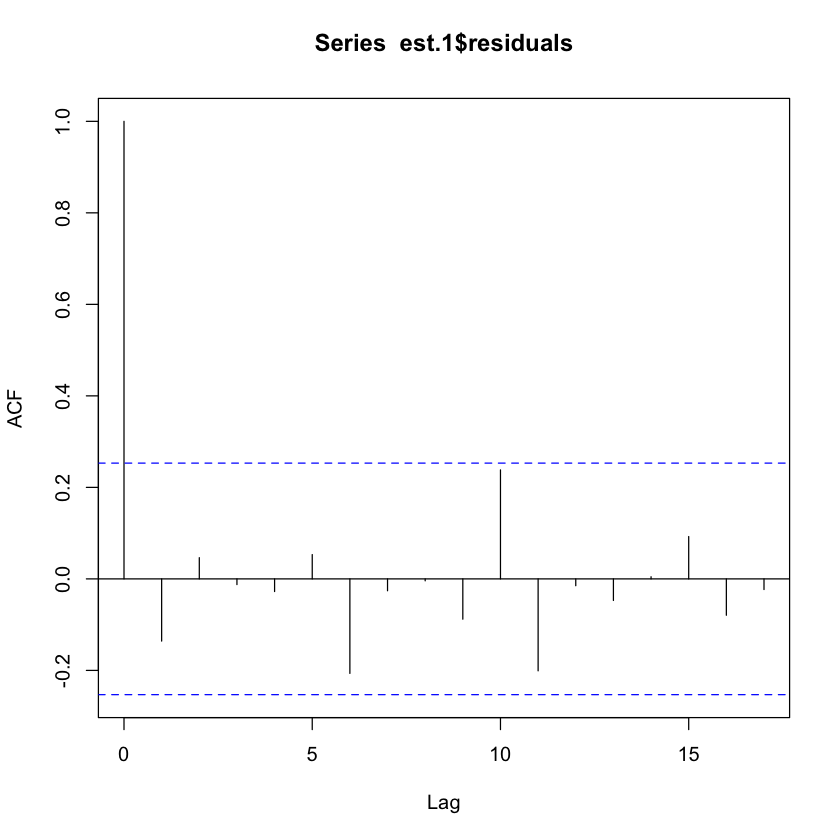

In [12]:
acf(est.1$residuals)

#### モデルの適合性評価(2) - リュング-ボックス検定にて「残差は系列相関を示さない」帰無仮説を棄却できるか確認

In [13]:
Box.test(est.1$residuals, lag = 10 ,type ="Ljung", fitdf=3)


	Box-Ljung test

data:  est.1$residuals
X-squared = 9.3261, df = 7, p-value = 0.2301


$\chi$2検定を有意水準5%で実施。P値＝0.23は帰無仮説を棄却できない。

---

改めて、作成したモデルの内容を確認。<br ><br >
est <br >
&emsp;arima関数にてAR次数=3としたARモデル <br >
est.1 <br >
&emsp;arima関数にてAR次数=3、第一係数を[0]と固定したしたARモデル <br >

---

#### 予測の当てはまり

- 1ステップ先の予測

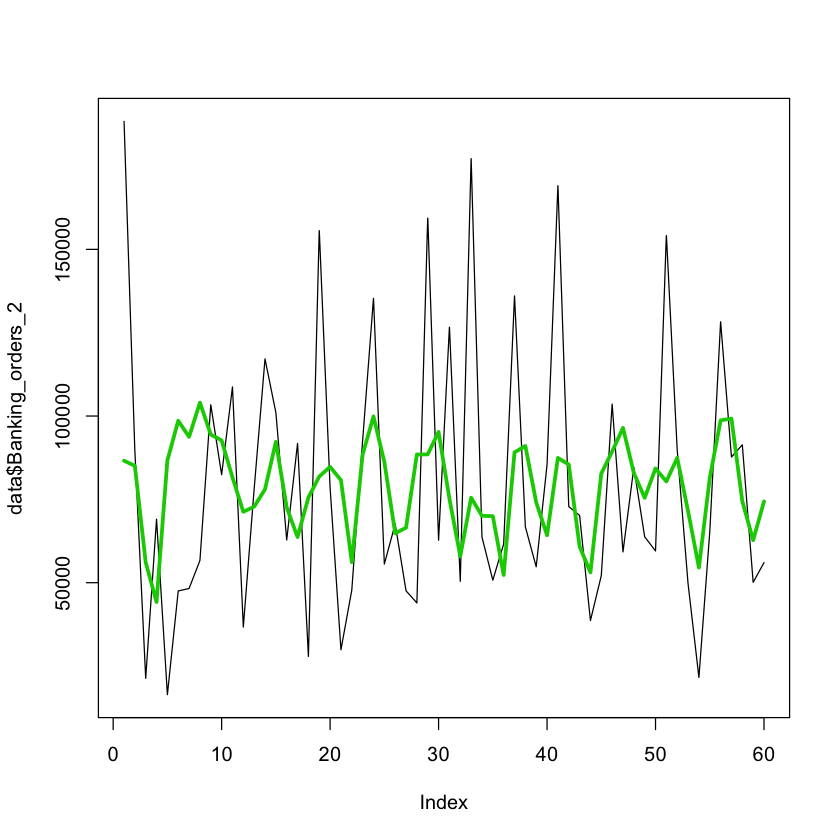

In [50]:
# forcastパッケージを使用して予測値と実測値を比較。
require(forecast)
plot(data$Banking_orders_2,type='l')
lines(fitted(est.1),col = 3,lwd =3)# forecastパッケージを使用

In [15]:
#実測値-予測値の相関
cor(data$Banking_orders_2,fitted(est.1))

[1] 0.3284392

[1] 0.2326063

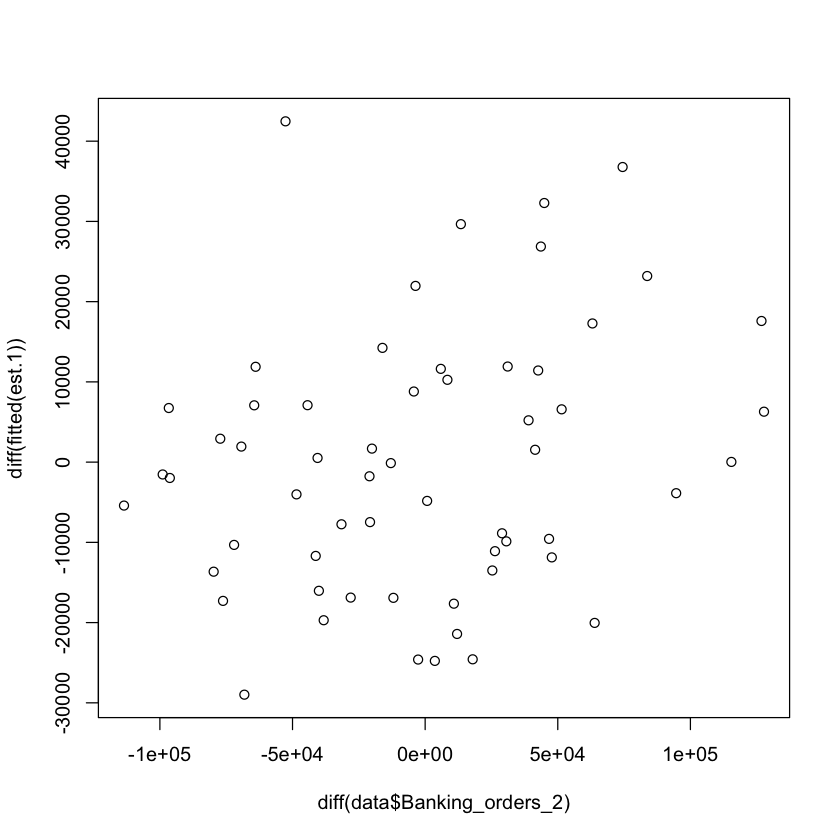

In [16]:
#実測値の階差-予測値の階差の相関
plot(diff(data$Banking_orders_2),diff(fitted(est.1)))
cor(diff(data$Banking_orders_2),diff(fitted(est.1)))

In [17]:
fitted(est.1,h =3)

A Time Series:
 [1]        NA        NA        NA  45068.26  79995.80 103142.74  80892.15
 [8]  94666.67  86121.80  84016.70  83223.69  69388.38  77780.20  71690.39
[15]  93239.98  79719.12  65295.40  73780.52  86998.24  76037.14  94257.81
[22]  55003.70  79151.48  98353.57  87008.64  71305.51  60889.81  88977.87
[29]  85022.24  87078.82  88175.41  51949.21  84911.04  68709.61  88584.61
[36]  51143.74  85577.65  92729.36  82711.52  59792.97  83892.46  89329.90
[43]  75805.68  50794.57  84473.59  86695.31  90825.70  85539.27  68643.69
[50]  84555.00  78247.54  82934.49  84936.18  54956.70  77425.29  92659.24
[57]  96247.63  79859.58  60647.62  77478.22

ポイント：<br >
&emsp;予測と実測を比較した元のプロットを見返すと、予測と実測の主な違いは、実測に比べて予測の変動が少ない　<br >
&emsp;→予測値は予測された分布の平均であるため、必然的に標本データより変動が小さくなる

- 多数のタイムステップ先の未来を予測する

In [18]:
# 予測値の分散
var(fitted(est.1,h=3),na.rm=TRUE)
var(fitted(est.1,h=5),na.rm=TRUE)
var(fitted(est.1,h=10),na.rm=TRUE)
var(fitted(est.1,h=20),na.rm=TRUE)
var(fitted(est.1,h=30),na.rm=TRUE)

[1] 174870141

[1] 32323722

[1] 1013396

[1] 1176.689

[1] 3.388713

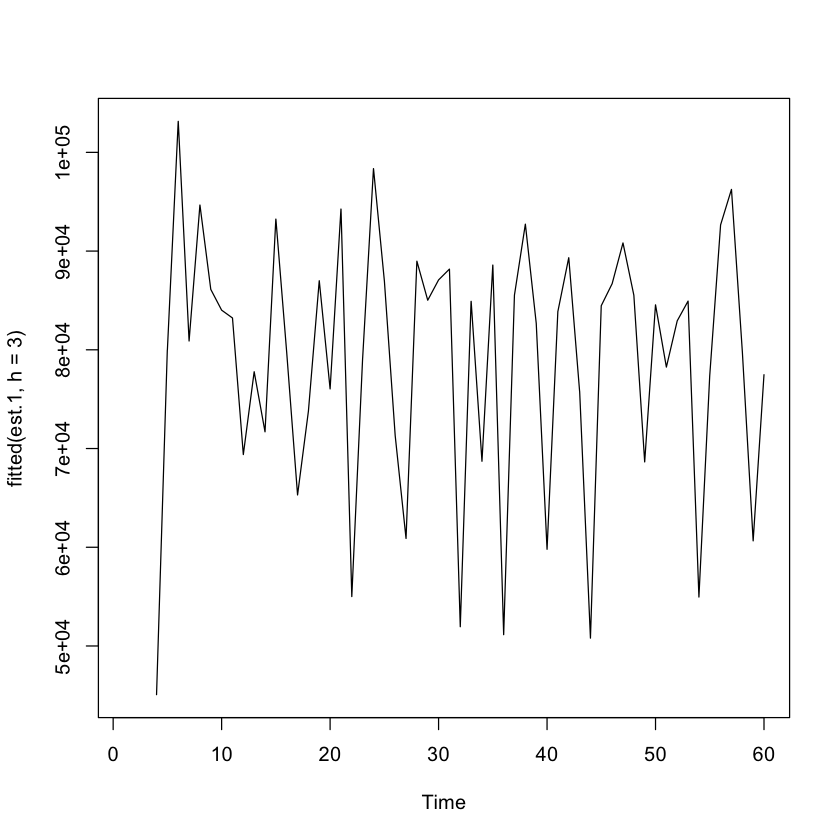

In [19]:
plot(fitted(est.1,h=3))

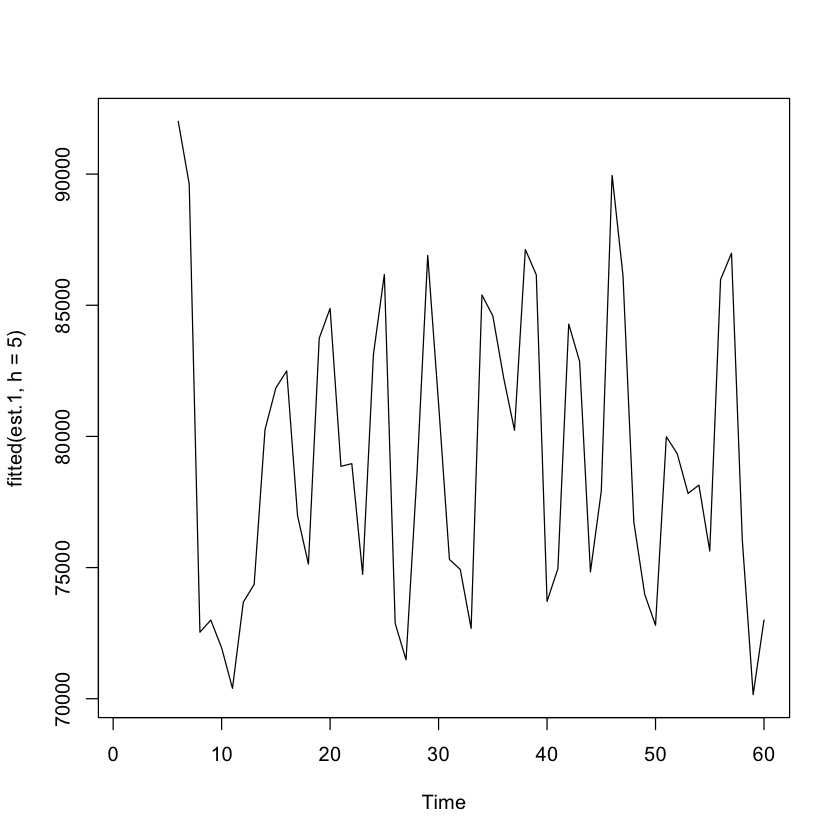

In [20]:
plot(fitted(est.1,h=5))

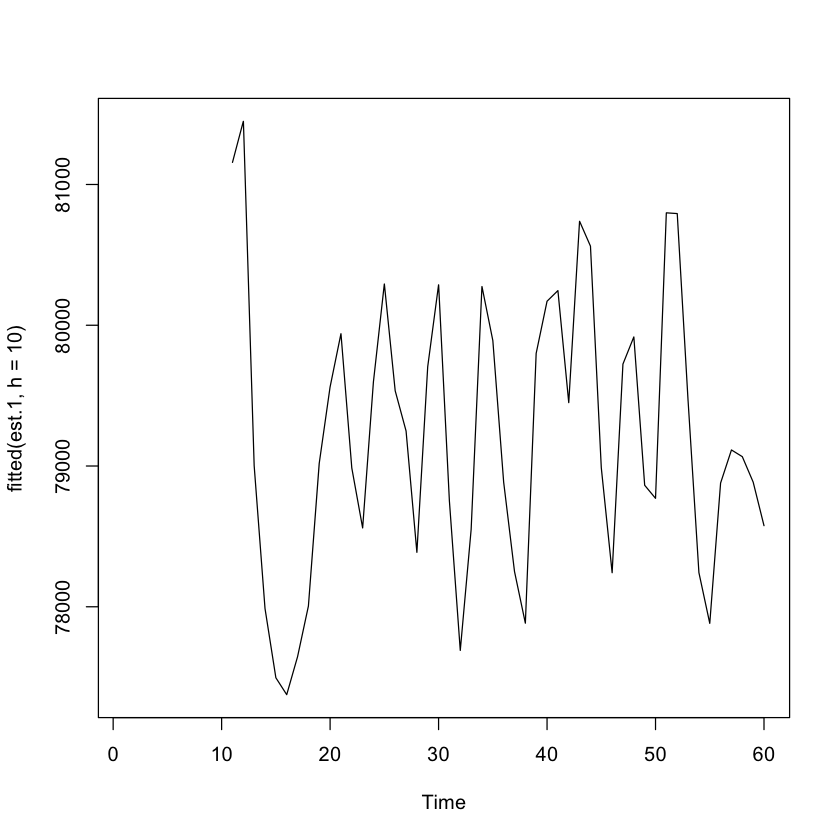

In [21]:
plot(fitted(est.1,h=10))

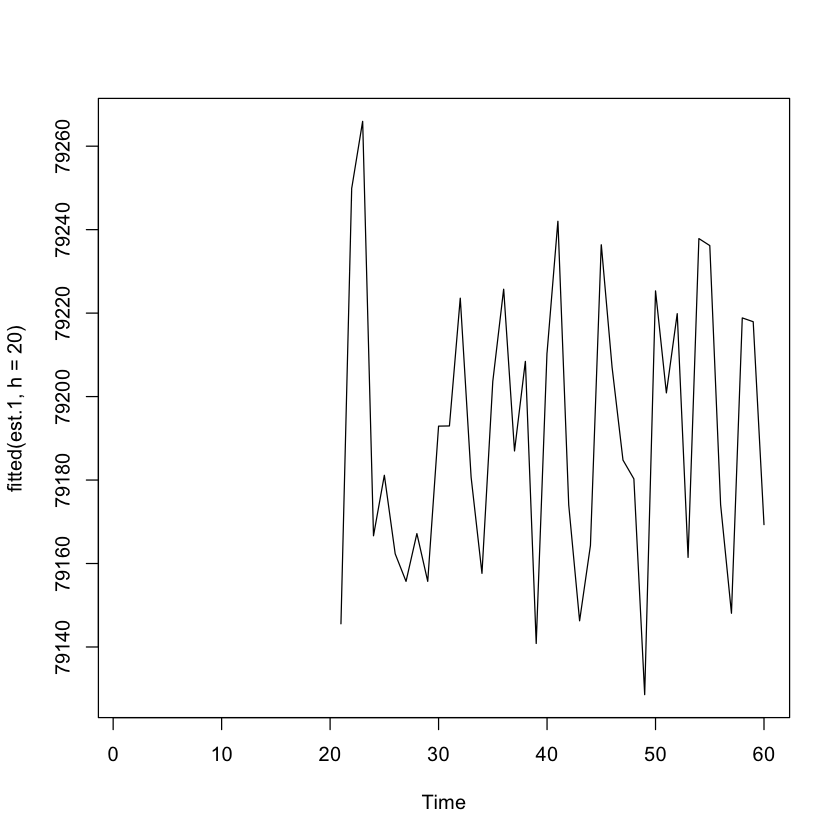

In [22]:
plot(fitted(est.1,h=20))

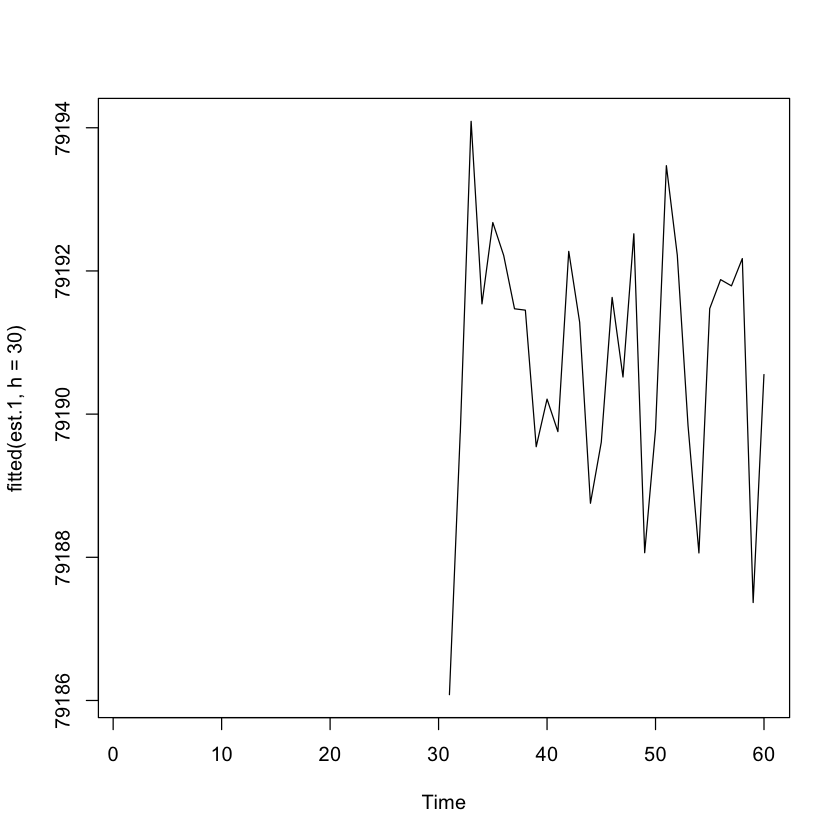

In [23]:
plot(fitted(est.1,h=30))

### 6.2.2移動平均モデル

MA(1)モデル<br >
&emsp;$
y_t = \mu + \epsilon_t + \theta_1 × \epsilon_{t-1}
$
<br >
→1時点前の誤差項（過去の誤差項）のみが当時点に影響を与える

MAモデルは定義上、パラメータに一切制約を課すことなく「弱定常」<br>
→MA過程の誤差項は平均ゼロの独立同分布と仮定されているので、MA過程の平均値と分散はどちらも有限で不変時なため。


上記より、誤差項の期待値はゼロ。よって、<br >
$E(y_t) = E(\mu + 0 + \theta_1 × 0)$ <br>
&emsp;&emsp;&emsp;&nbsp;&nbsp;$=\mu$

また、MA過程の分散は、<br>
1. $e_t$の項が独立同分布であること
2. 2個のランダム変数の和の分散は、「個々の分散」と「共分散」の和である

という性質を利用。<br >
$var(y_t)=(1+\sum_{i=1}^{q}\theta) × \sigma_e^2 \quad $


#### MA(q)過程のパラメータ選択

パラメータ選択を行うため、ACF(自己相関関数)を確認<br >
→[理由]<br>
&emsp;MA過程は誤差項を除いた系列は定数であるため、1時点前のみの自己相関でOK。


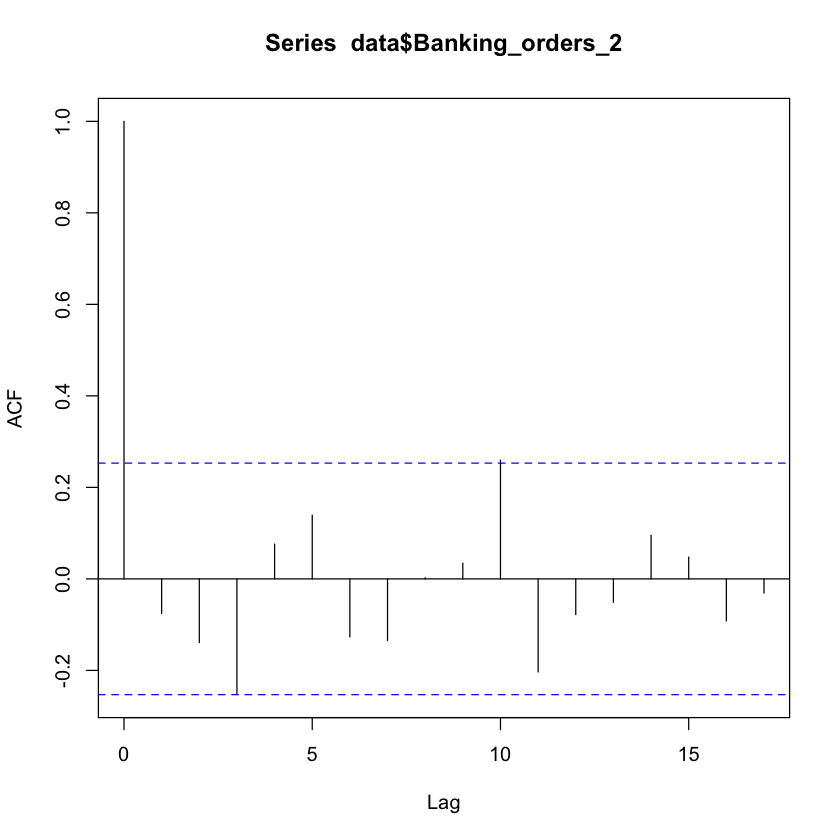

In [51]:
acf(data$Banking_orders_2)

ACFのコレログラムより、ラグ3、ラグ10に有意な値が見られる。<br>
→MAモデルへ当てはめ

#### モデルの当てはめ

In [52]:
ma.est <- arima(x=data$Banking_orders_2,order=c(0,0,10),fixed=c(0,0,NA,rep(0,6),NA,NA))
ma.est


Call:
arima(x = data$Banking_orders_2, order = c(0, 0, 10), fixed = c(0, 0, NA, rep(0, 
    6), NA, NA))

Coefficients:
      ma1  ma2      ma3  ma4  ma5  ma6  ma7  ma8  ma9    ma10  intercept
        0    0  -0.3744    0    0    0    0    0    0  0.2773  78921.483
s.e.    0    0   0.1385    0    0    0    0    0    0  0.1367   4092.397

sigma^2 estimated as 1.305e+09:  log likelihood = -715.56,  aic = 1439.11

#### モデルの適合性評価(1) - リュング-ボックス検定にて「残差は系列相関を示さない」帰無仮説を棄却できるか確認

In [53]:
Box.test(ma.est$residuals,lag=10,type="Ljung",fitdf=3)


	Box-Ljung test

data:  ma.est$residuals
X-squared = 3.4803, df = 7, p-value = 0.8373


$\chi$2検定を有意水準5%で実施。P値＝0.83は帰無仮説を棄却できない。

---

#### モデルの適合性評価(2) - 残差のACFをプロットしてモデルが網羅しない自己相関パターンがあるかを確認

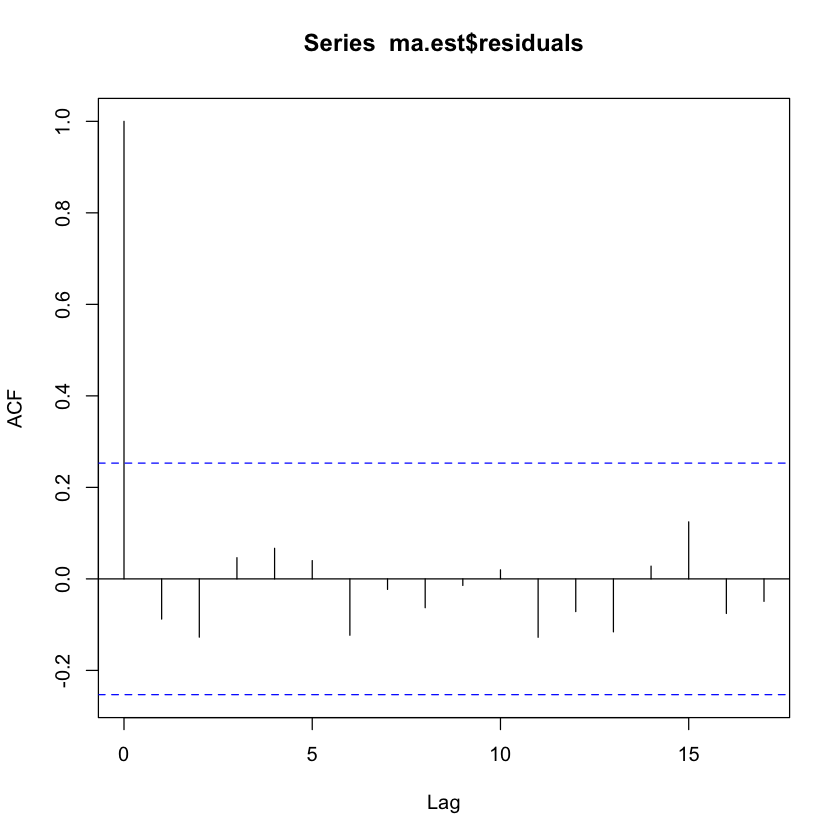

In [54]:
acf(ma.est$residuals)

#### 予測の当てはまり

In [56]:
require(forecast)
fitted(ma.est,h=1)

A Time Series:
 [1]  89164.52  79907.48  73531.31  46369.25  72872.37  94318.33  69880.74
 [8]  88022.92  97007.34  92660.71 114108.15  79575.15  70344.93  87140.81
[15]  79938.52  63686.94  62264.10  62287.28  81853.63  65029.23  89531.51
[22]  40177.16  76051.83 109161.45  82131.41  72333.46  77169.50  79478.49
[29] 101158.87  93560.83  75714.98  59349.95  95027.29  67125.14  74900.44
[36]  46860.16  72021.78  78067.55  89562.94  46418.96  97265.29  89474.97
[43]  87127.53  51078.41  78448.99  89362.65 101320.89  85632.00  63966.75
[50] 105479.12  99242.74  74380.08  91426.59  54925.10  65881.78  98500.72
[57]  79738.07  78877.99  67723.48  63191.64

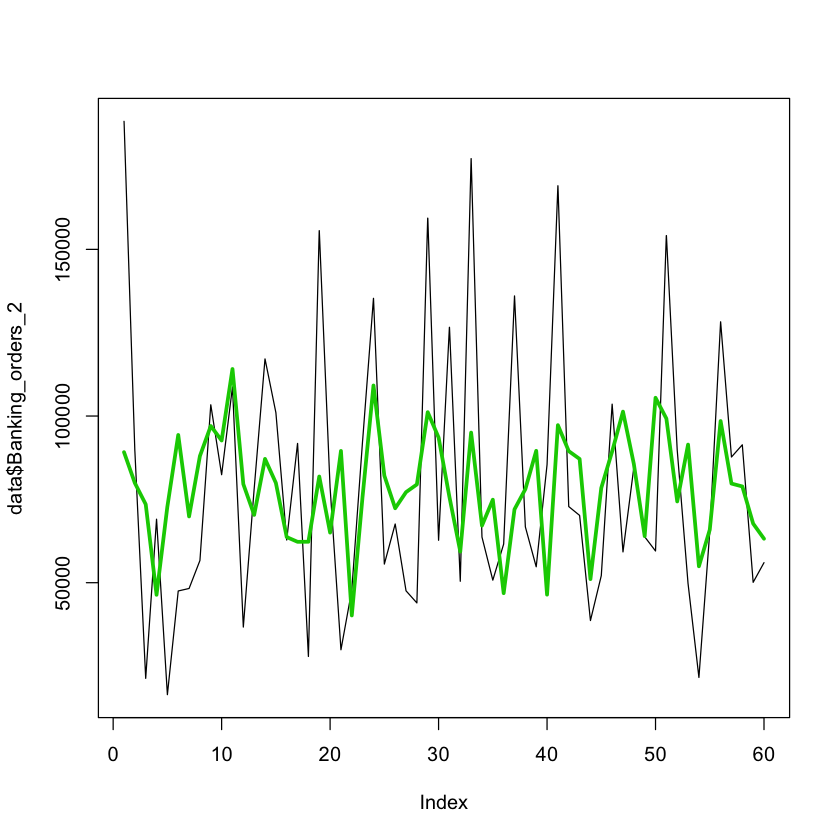

In [57]:
# forcastパッケージを使用してMAモデルの予測値と実測値を比較。
plot(data$Banking_orders_2,type='l')
lines(fitted(ma.est),col = 3,lwd =3)# forecastパッケージを使用

In [58]:
#実測値-予測値の相関
cor(data$Banking_orders_2,fitted(ma.est))

[1] 0.4386329

[1] 0.4250379

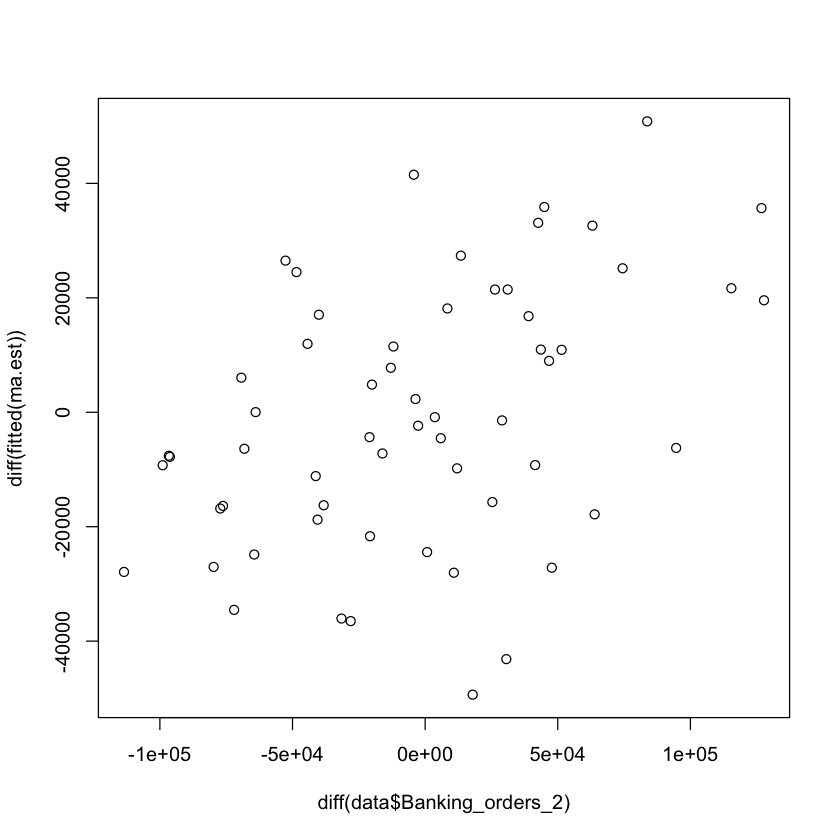

In [59]:
#実測値の階差-予測値の階差の相関
plot(diff(data$Banking_orders_2),diff(fitted(ma.est)))
cor(diff(data$Banking_orders_2),diff(fitted(ma.est)))

### 6.2.3 自己回帰和分移動平均モデル

#### 自己回帰移動平均モデル(ARMAモデル)


ARモデルとMAモデルを両方組み合わせたもの。

$
y_t=\phi_0+\sum(\phi_i×y_{t-i})+e_t-\sum(\theta_i×e_{t-1})
$

▼MA過程部分はなぜマイナスになるのか<br >
&emsp;（この理解であっている？）<br>
&emsp;→MA過程は「1時点前の誤差項を加算」することで成り立つ。<br >
&emsp;&nbsp;&nbsp;そのため、当時点においては、当時点の誤差が不要となるため、マイナスする。

#### モデルの選択

コレログラムからモデル判定可能。

|プロットの種類|AR(p)|MA(q)|ARMA|
|-|-|-|-|
|ACFの挙動|緩やかに減少|ラグq後に急落|急峻なカットオフなし|
|PACFの挙動|ラグp後に急落|緩やかに減少|急峻なカットオフなし|

#### 自己回帰和分移動平均モデル(ARIMAモデル)

ARモデルとMAモデルを両方組み合わせたARMAモデルに「和分(integrated)」が加わったもの。

▼和分とは<br >
モデルにあてはめる時系列の階差を何回取れば定常になるか

改めて(弱)定常性:<br>
&emsp; 1. 期待値は時点によらず一定($\mu_t$=$\mu$)<br>
&emsp; 2. 分散は時点によらず一定($\theta_t$=$\theta$)<br>
&emsp; 3. 自己共分散は時間差のみに依存し、時点と無関係<br>

→時系列の階差を取ることで期待値（平均）と分散がどの時点においても一定である。<br>
→原系列のt-1時点とt時点との差分が確率分布に従う。

(例)
- 株価
- 顧客数
- 売上金額（売上数量の方が妥当か？）


#### パラメータの選択

ARIMAモデルはパラメータ(p,d,q)にて規定される。
- p：ARモデル部分の次数
- d：和分の階差回数
- q：MAモデル部分の次数

ARIMAモデルの有名な例
- ARIMA(0,0,0)：ホワイトノイズ
- ARIMA(0,1,0)：ランダムウォーク
- ARIMA(0,1,1)：指数平滑化モデル
- ARIMA(0,2,2)：ホルト線形法（指数平滑化をトレンドのあるデータの拡張し、背後にトレンドのあるデータの予測に使用可能）

##### ARIMAモデルのパラメータ当てはめ

###### 1.ボックス・ジェンキンス法
(1) 

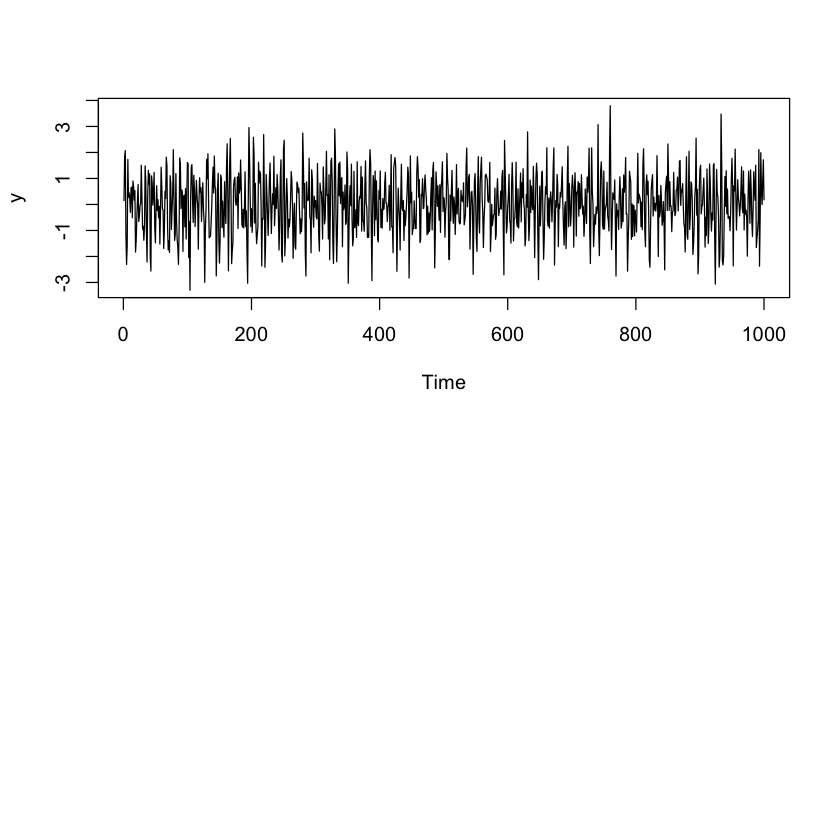

In [32]:
require(forecast)
set.seed(1017)
y=arima.sim(n=1000,list(ar = c(0.8,-0.4),ma=c(-0.7)))
par(mfrow=c(2,1))
plot(y)


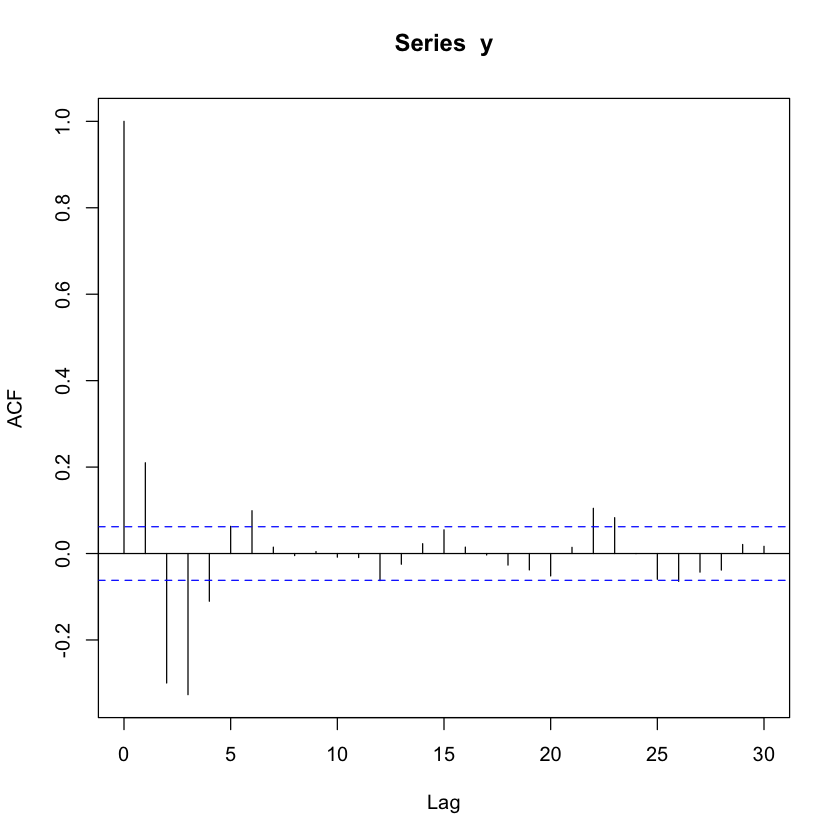

In [33]:
acf(y)

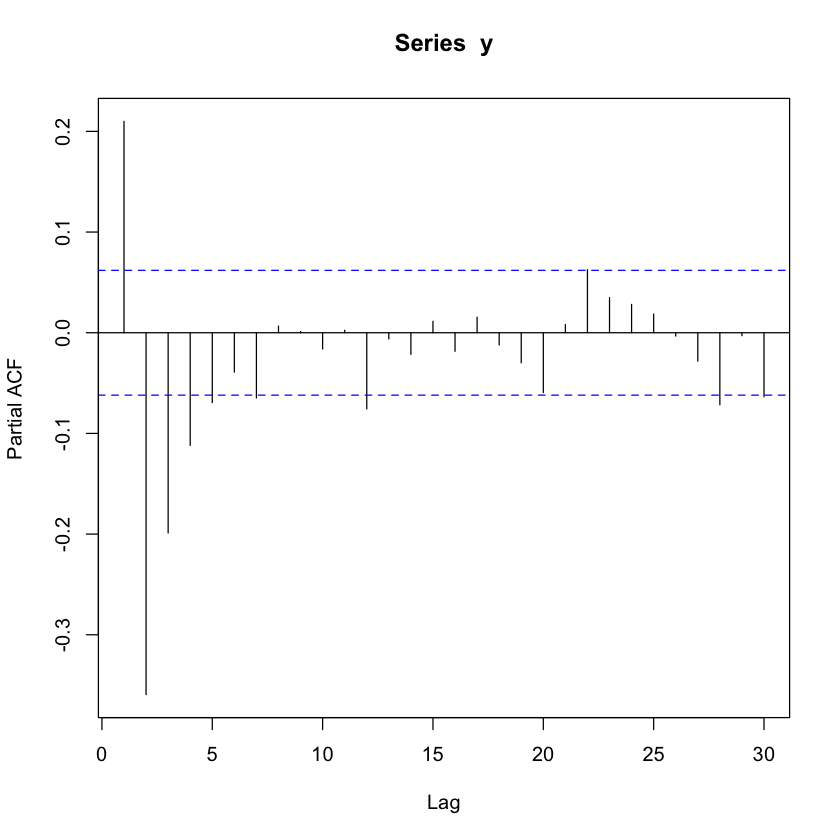

In [34]:
pacf(y)

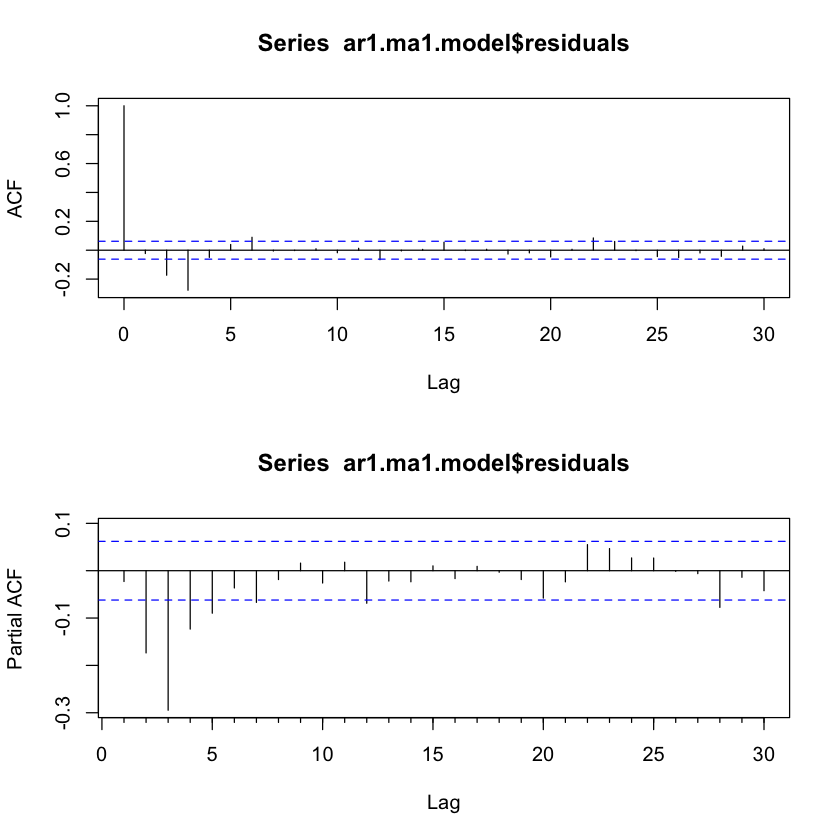

In [35]:
# ARIMA(1,0,1)モデルの当てはめ
ar1.ma1.model= Arima(y,order = c(1,0,1))
par(mfrow = c(2,1))
acf(ar1.ma1.model$residuals)
Pacf(ar1.ma1.model$residuals)

ARIMA(1,0,1)の場合、残差のPACF値が特に大きい。<br >
→自己回帰の挙動を完全に表せていない。<br >
→モデルに高次のAR成分を追加


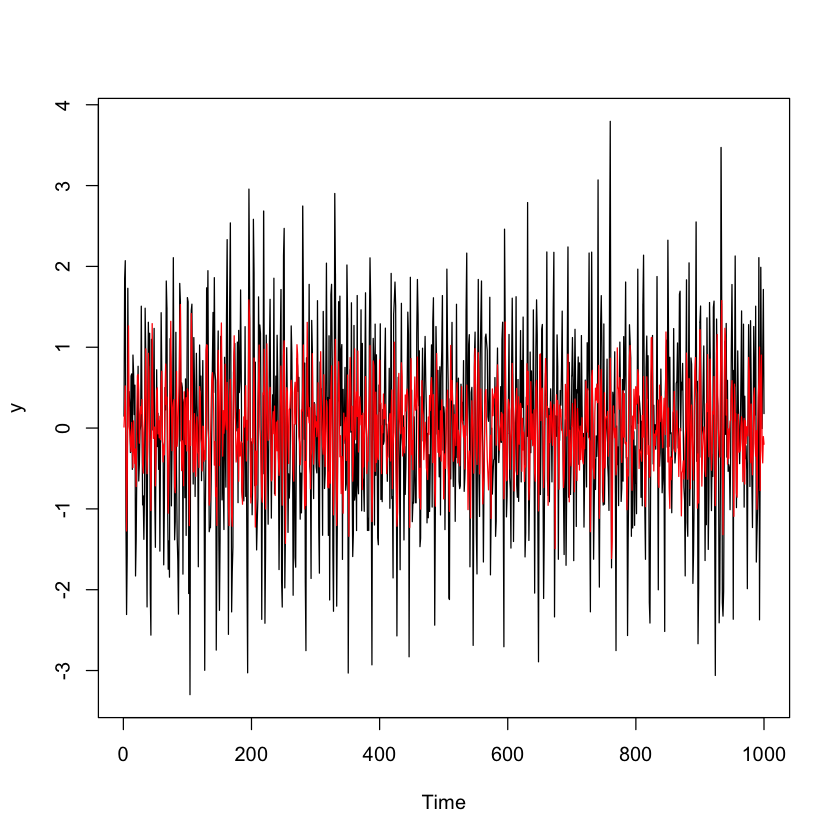

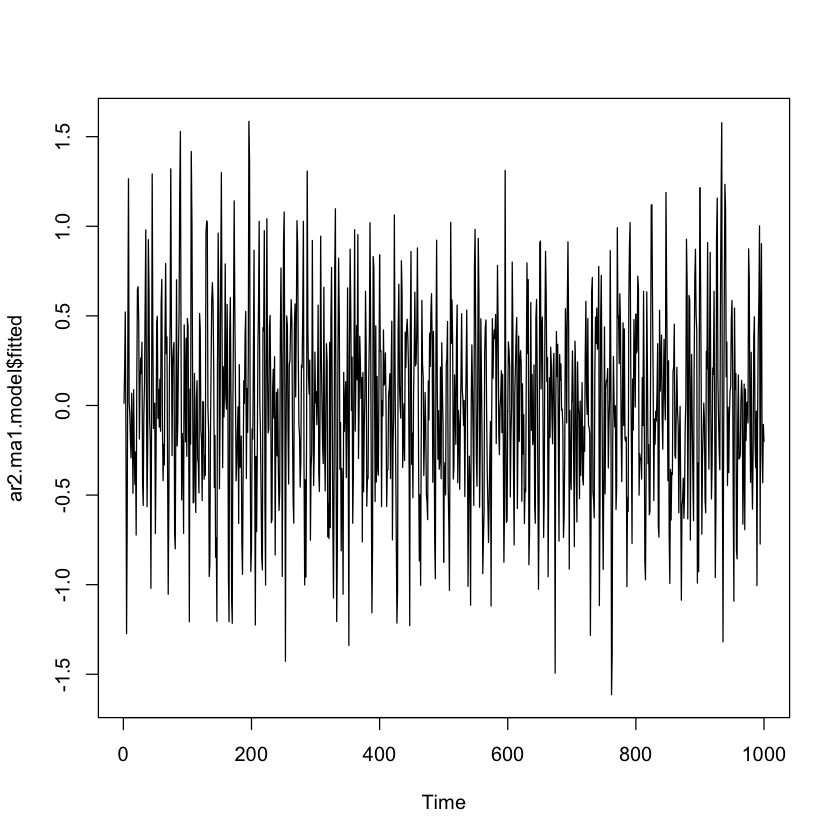

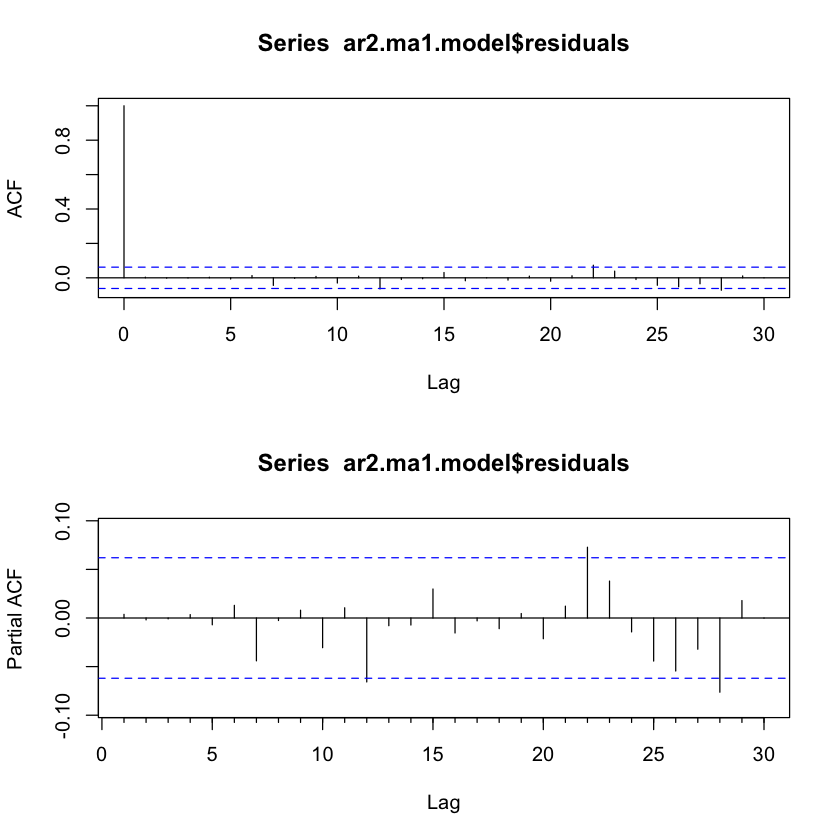

In [36]:
# ARIMA(2,0,1)モデルの当てはめ
ar2.ma1.model= Arima(y,order = c(2,0,1))
plot(y,type='l')
lines(ar2.ma1.model$fitted,col=2)
plot(ar2.ma1.model$fitted)
par(mfrow = c(2,1))
acf(ar2.ma1.model$residuals)
Pacf(ar2.ma1.model$residuals)

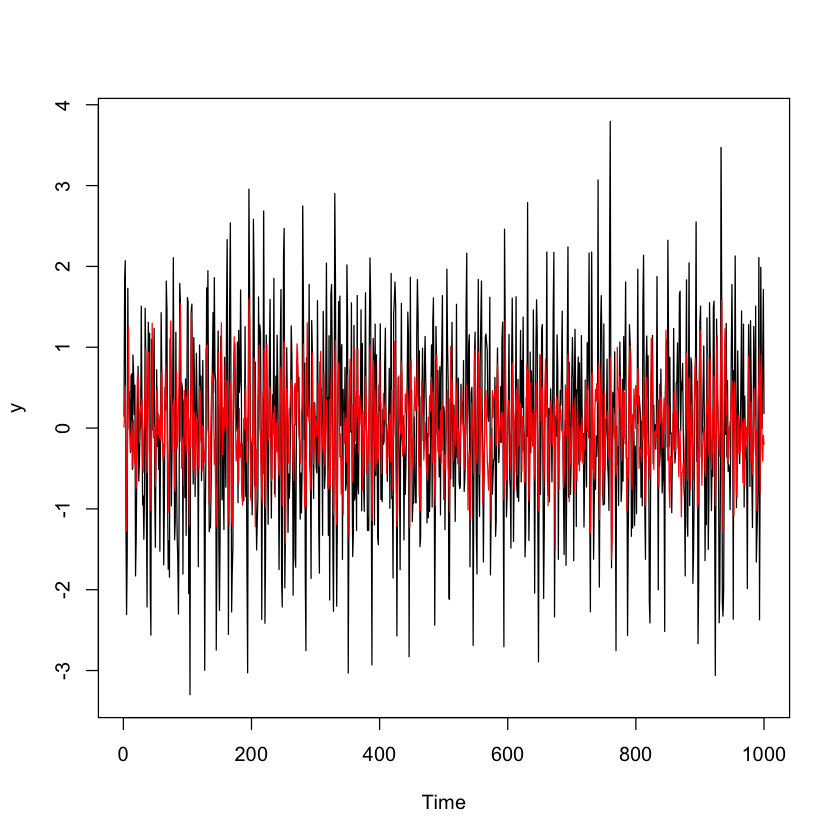

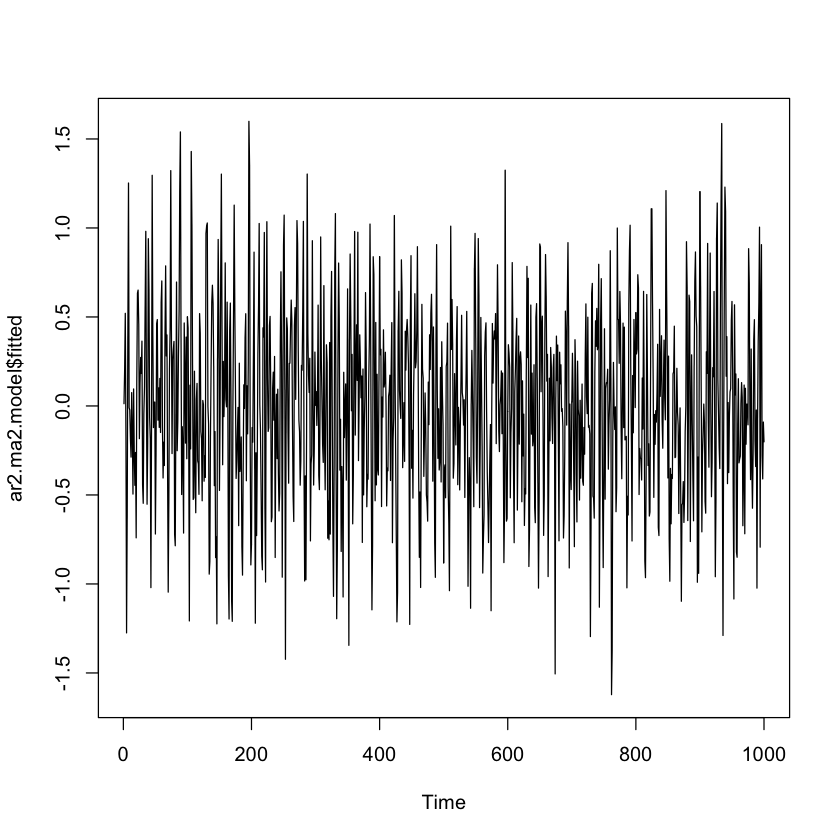

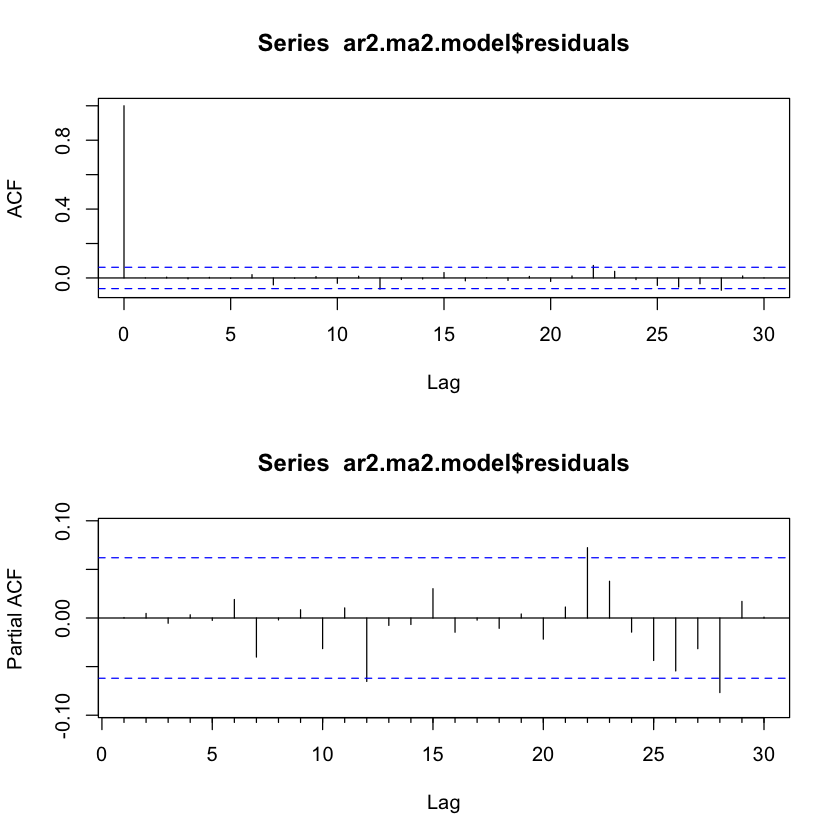

In [37]:
# ARIMA(2,0,2)モデルの当てはめ
ar2.ma2.model= Arima(y,order = c(2,0,2))
plot(y,type='l')
lines(ar2.ma2.model$fitted,col=2)
plot(ar2.ma2.model$fitted)
par(mfrow = c(2,1))
acf(ar2.ma2.model$residuals)
Pacf(ar2.ma2.model$residuals)

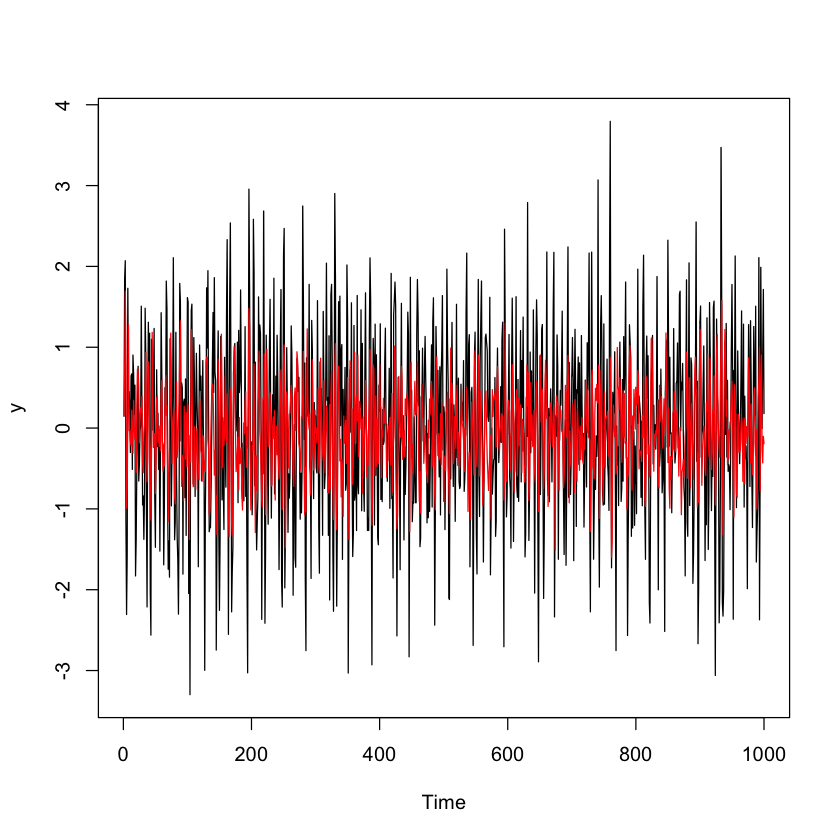

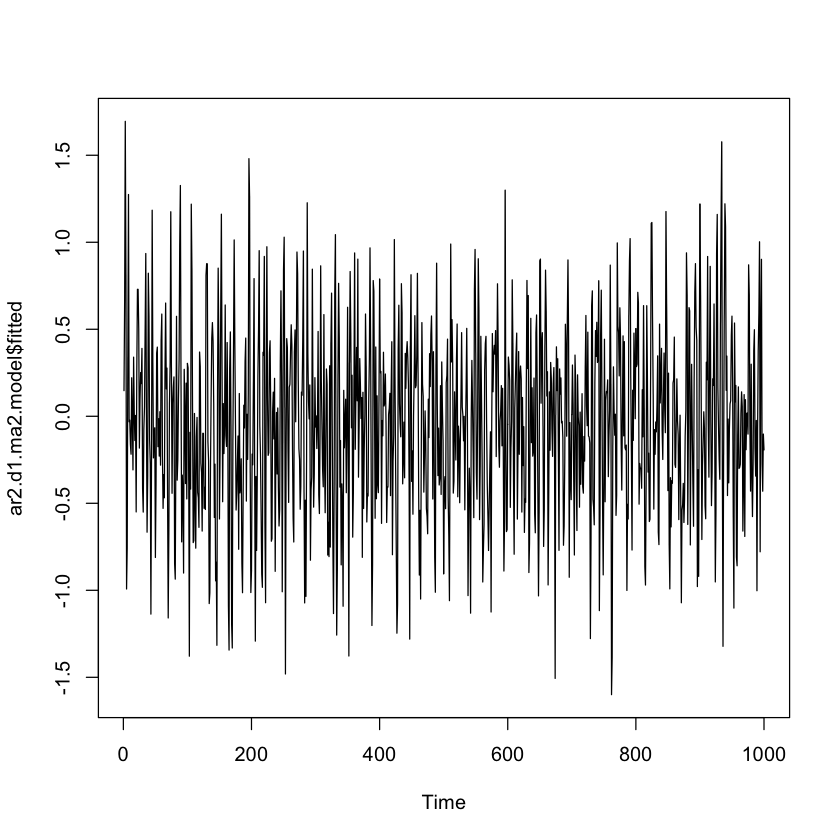

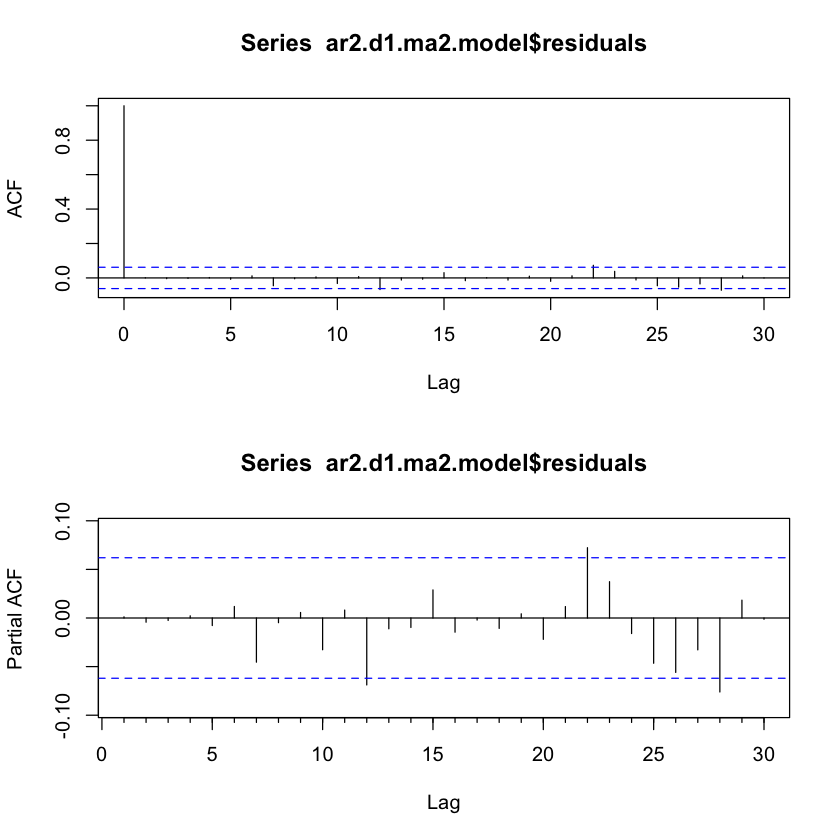

In [38]:
# ARIMA(2,1,2)モデルの当てはめ
ar2.d1.ma2.model= Arima(y,order = c(2,1,2))
plot(y,type='l')
lines(ar2.d1.ma2.model$fitted,col=2)
plot(ar2.d1.ma2.model$fitted)
par(mfrow = c(2,1))
acf(ar2.d1.ma2.model$residuals)
Pacf(ar2.d1.ma2.model$residuals)

In [39]:
cor(y,ar1.ma1.model$fitted)
cor(y,ar2.ma1.model$fitted)
cor(y,ar2.ma2.model$fitted)
cor(y,ar2.d1.ma2.model$fitted)

[1] 0.3018926

[1] 0.4683598

[1] 0.4684905

[1] 0.4688166

In [40]:
ar2.ma1.model$coef
# 元の係数　y=arima.sim(n=1000,list(ar = c(0.8,-0.4),ma=c(-0.7)))

ar1          ar2          ma1    intercept 
 0.785028320 -0.462287054 -0.612708282 -0.005227573

ARIMA(2,0,1)モデルによる係数とほぼ等しいことが確認できる。

###### 2.モデルの自動当てはめ (auto.arima() )

auto.arima関数を使用してAICにて最適なモデルの自動当てはめを行う<br>
auto.arima関数は、情報量基準（AIC,AICc,BIC）に依拠してグリッドサーチを行う。


In [41]:
# 事例1:需要予測データ [Banking_orders_2] に対するモデルの自動当てはめ
# ACF、PACFのコレログラムによりARモデル部分の最大次数とMAモデル部分の最大次数を指定する。
est=auto.arima(data$Banking_orders_2,stepwise = FALSE,max.p=3,max.q=9)
est

Series: data$Banking_orders_2 
ARIMA(0,0,3) with non-zero mean 

Coefficients:
          ma1      ma2      ma3       mean
      -0.0645  -0.1144  -0.4796  79914.783
s.e.   0.1327   0.1150   0.1915   1897.405

sigma^2 estimated as 1.467e+09:  log likelihood=-716.71
AIC=1443.42   AICc=1444.53   BIC=1453.89

▼auto.arima関数のヘルプ
https://www.rdocumentation.org/packages/forecast/versions/8.15/topics/auto.arima<br ><br >
引数：<br>
- stepwise<br>
&emsp;If "TRUE", will do stepwise selection (faster). Otherwise, it searches over all models. Non-stepwise selection can be very slow, especially for seasonal models.<br>

- max.d<br>
&emsp;Maximum number of non-seasonal differences

- max.D<br>
&emsp;Maximum number of seasonal differences<br>

（所管：意外とMAモデルなんだ。。。）

In [42]:
# 事例2:手操作で作成した系列に対するモデルの自動当てはめ
auto.model=auto.arima(y)
auto.model
# 元の係数　y=arima.sim(n=1000,list(ar = c(0.8,-0.4),ma=c(-0.7)))

Series: y 
ARIMA(2,0,1) with zero mean 

Coefficients:
         ar1      ar2      ma1
      0.7847  -0.4622  -0.6123
s.e.  0.0487   0.0285   0.0522

sigma^2 estimated as 1.019:  log likelihood=-1427.21
AIC=2862.41   AICc=2862.45   BIC=2882.04

ボックス・ジェンキンス法で得たモデルと同じ

▼本文中に記載の留意事項<br>
- auto.arima()や類似の自動化されたモデル選択ツールを使うのならツールの仕様をきちんと理解すること！
- 自動化されたモデル選択ツールを使うのなら合成データで試してみること！（期待通りにうまく機能しないことが既知である場合も。）
- 自動化されたモデル選択ツールは万能／完璧ではないことを理解しておくこと！

▼オンラインテキスト<br>
Forecasting: Principles and Practice (2nd ed)<br>
https://otexts.com/fpp2/


### 6.2.4 ベクトル自己回帰モデル

今までの議論は1変量に対する時系列予測。<br>
本項では多変量を取り扱う。

ベクトル自己回帰では、系列が互いに影響を与えあうことを想定している。<br><br>
▼利用シーン<br>
- 計量経済学（例：日銀の量的緩和政策の経済効果、貿易構造）


2変量 VAR(1)モデルの場合<br ><br >
$
y_{1t} = c_1 + \phi_{11} × y_{1,t-1} + \phi_{12} × y_{2,t-1} + \epsilon_{1t}
$

$
y_{2t} = c_2 + \phi_{12} × y_{1,t-1} + \phi_{22} × y_{2,t-1} + \epsilon_{2t}
$

---

UCI機械学習レポジトリの需要予測データの11カラム目、12カラム目（　Banking_orders_(2),Banking_orders_(3) ）を使用する。

In [43]:
vardata <- data.frame(data$Banking_orders_2,data$Banking_orders_3)

In [44]:
head(vardata,10)

,data.Banking_orders_2,data.Banking_orders_3
,<int>,<int>
1,188411,14793
2,89461,7679
3,21305,14947
4,69054,18423
5,16411,20257
6,47522,24966
7,48269,20973
8,56665,18502
9,103376,10458


##### 使用するパラメータの判定

複数の情報量基準による最適な次数を検出してくれるvarsパッケージのVARselect()メソッドを使用する

In [60]:
require(vars)
VARselect(vardata,lag.max = 4, type =c("const"))

,1,2,3,4
AIC(n),3.975854e+01,3.967373e+01,3.957496e+01,3.968281e+01
HQ(n),3.984267e+01,3.981395e+01,3.977126e+01,3.993521e+01
SC(n),3.997554e+01,4.003540e+01,4.008130e+01,4.033382e+01
FPE(n),1.849280e+17,1.700189e+17,1.542863e+17,1.723729e+17


▼引数<br>
type<br>
&emsp;"none"：定数項を含めない<br>
&emsp;"const"：定数項を含める<br>
&emsp;"trend"：トレンド項を含める<br>
&emsp;"both"：トレンド項と定数項を両方含める

AICでは次数：3と判定。

##### 各次数の定数項を算出

In [46]:
est.var <- VAR(vardata,p=3,type="const")
est.var


VAR Estimation Results:

Estimated coefficients for equation data.Banking_orders_2: 
Call:
data.Banking_orders_2 = data.Banking_orders_2.l1 + data.Banking_orders_3.l1 + data.Banking_orders_2.l2 + data.Banking_orders_3.l2 + data.Banking_orders_2.l3 + data.Banking_orders_3.l3 + const 

data.Banking_orders_2.l1 data.Banking_orders_3.l1 data.Banking_orders_2.l2 
           -2.134351e-01            -1.070454e+00            -3.332587e-02 
data.Banking_orders_3.l2 data.Banking_orders_2.l3 data.Banking_orders_3.l3 
            6.778114e-01            -2.378322e-01             8.626345e-01 
                   const 
            1.055717e+05 


Estimated coefficients for equation data.Banking_orders_3: 
Call:
data.Banking_orders_3 = data.Banking_orders_2.l1 + data.Banking_orders_3.l1 + data.Banking_orders_2.l2 + data.Banking_orders_3.l2 + data.Banking_orders_2.l3 + data.Banking_orders_3.l3 + const 

data.Banking_orders_2.l1 data.Banking_orders_3.l1 data.Banking_orders_2.l2 
            9.985195

##### 実測値と予測値をプロット（赤線が予測値）

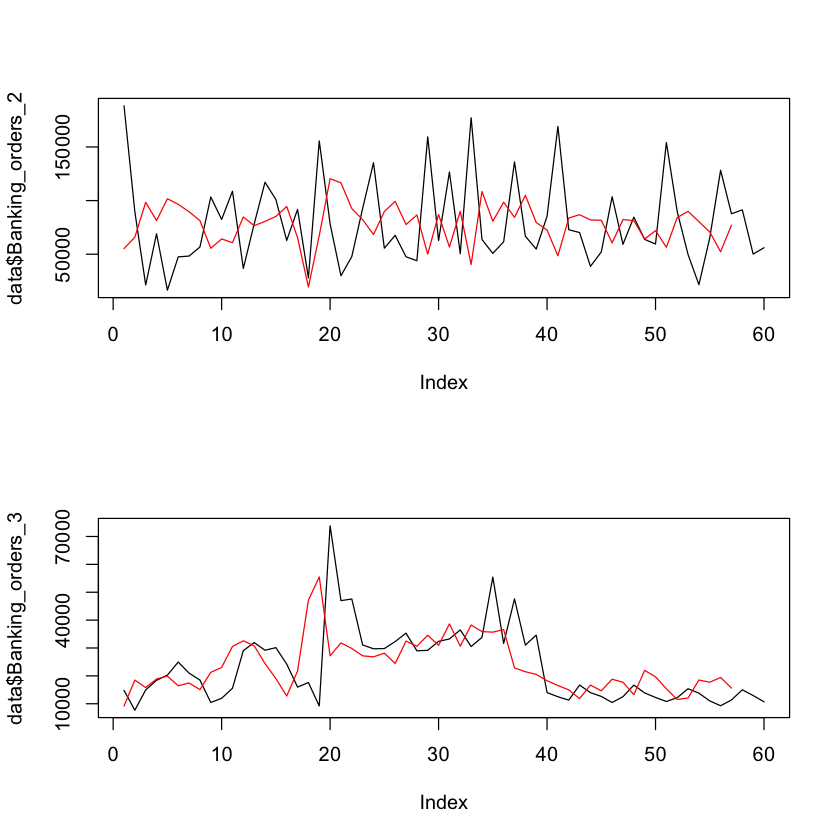

In [47]:
par(mfrow=c(2,1))
plot(data$Banking_orders_2,type="l")
lines(fitted(est.var)[,1],col=2)
plot(data$Banking_orders_3,type="l")
lines(fitted(est.var)[,2],col=2)

系列[Banking_orders_2]は実測値に比べて予測値が**遅行して**（現実は予測より早く変化が起きて）いるように見える。<br>
系列[Banking_orders_3]は実測値に比べて予測値が**先行して**（現実は予測より遅く変化が起きて）いるように見える。<br>
→系列[Banking_orders_2]は系列[Banking_orders_3]を予測するのに役立つと考えられる。（逆は成り立たない）

##### モデルの評価（実測と予測の残差に自己相関が存在するかを確認）

Warning message in data$Banking_orders_2 - fitted(est.var)[, 1]:
“longer object length is not a multiple of shorter object length”
Warning message in data$Banking_orders_3 - fitted(est.var)[, 2]:
“longer object length is not a multiple of shorter object length”


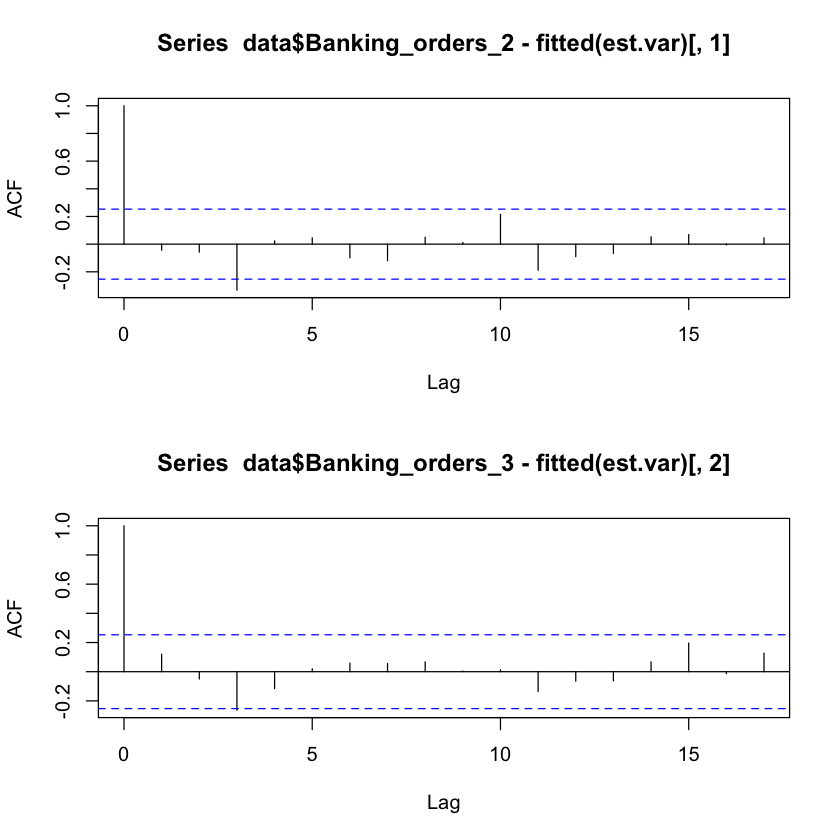

In [61]:
par(mfrow=c(2,1))
acf(data$Banking_orders_2 - fitted(est.var)[,1])
acf(data$Banking_orders_3 - fitted(est.var)[,2])

ACFでは残差に自己相関が存在しないとは言い切れない。<br>
→カバン検定を適用して系列相関を確認

##### カバン検定（portmanteau test）

varsパッケージのserial.test()を使用する。

In [49]:
serial.test(est.var,lags.pt=8,type="PT.asymptotic")


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object est.var
Chi-squared = 20.463, df = 20, p-value = 0.4293

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object est.var
Chi-squared = 20.463, df = 20, p-value = 0.4293



P値が非常に大きいため、残差に系列相関が無いという帰無仮説は棄却できない。<br>
→モデルが有効である

##### 他の多変量を取り扱う時系列モデル

VARIMAモデルは存在するが、VARモデルの性能が比較的良いこと、すでに相当複雑であることからそれほど使われない。

### 6.2.5 統計モデルのバリエーション

#### 季節性ARIMA

モデル式<br>
ARIMA$(p,d,q)×(P,D,Q)m$<br>
$m$：季節周期あたりのタイムステップ数<br>

#### ARCH

自己回帰条件付き分散不均一モデル<br>
金融業界でのみ使用される。<br><br>
▼モデルの前提
- 株価の分散は一定ではない
- 分散自体も以前の分散に自己回帰条件付き
<br>→自己回帰過程としてモデル化されるのは過程そのものではなく、「過程の分散」

#### 階層時系列モデル

対象系列に階層構造がある場合に利用。（全体-小集団）<br>
htsパッケージを利用

## 6.3 時系列用の統計的手法の長所と短所

#### 長所

- 単純。パラメータの観点から明解に理解可能。（→顧客説明がしやすい？）
- 単純な数学的表現で定義されるため、モデルの注目する特性を統計的に厳密に求めることができる。
- **相当小さいデータセットに適用しても良い結果が得られる。**
- 非常に複雑な機械学習モデルに遜色のない性能を持つ。過剰適合の恐れが少ない。
- 次数の選択とパラメータ推定の自動化手法がこなれているので、予測の作成が容易にできる。

#### 短所

- 単純な故に大きなデータセットが与えられると必ずしも性能が向上しない。
<br>→大きなデータセットの場合、機械学習やニューラルネットの方が効果的かもしれない。
- 分布そのものの推定よりも、分布の平均値の点推定に焦点が当てられている。
<br>→不確実性を表現するのに限定的な方法しか持たない。
- 定義上、非線形の場合はデータをうまく表現できない。

# 参考文献

- **経済・ファイナンスデータの軽量時系列分析**<br>
https://www.amazon.co.jp/経済・ファイナンスデータの計量時系列分析-統計ライブラリー-沖本-竜義/dp/4254127928/ref=asc_df_4254127928/?tag=jpgo-22&linkCode=df0&hvadid=295682859002&hvpos=&hvnetw=g&hvrand=3015948823815210916&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1009307&hvtargid=pla-589639086197&psc=1&th=1&psc=1
- **統計解析スタンダード　経済時系列と季節調整法**<br>
https://www.amazon.co.jp/経済時系列と季節調整法-統計解析スタンダード-高岡-慎/dp/4254128584